In [ ]:
#Import everything from biocrnpyler
!pip install biocrnpyler[all]
!pip install pandas
from biocrnpyler import *

#Used for simulations via Bioscrape
# Install emcee
!pip install emcee
 
# Install bioscrape
!git clone https://github.com/biocircuits/bioscrape.git
!(cd bioscrape; python setup.py install)
 
# Make sure it worked
import bioscrape


     |████████████████████████████████| 112kB 6.2MB/s 
     |████████████████████████████████| 6.2MB 6.9MB/s 
     |████████████████████████████████| 51kB 3.1MB/s 
Cloning into 'bioscrape'...
remote: Enumerating objects: 9, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (9/9), done.
remote: Total 1724 (delta 3), reused 1 (delta 0), pack-reused 1715
Receiving objects: 100% (1724/1724), 134.71 MiB | 22.52 MiB/s, done.
Resolving deltas: 100% (1090/1090), done.
Installing Bioscrape...
Compiling bioscrape/random.pyx because it changed.
Compiling bioscrape/types.pyx because it changed.
Compiling bioscrape/simulator.pyx because it changed.
Compiling bioscrape/inference.pyx because it changed.
[1/4] Cythonizing bioscrape/inference.pyx
[2/4] Cythonizing bioscrape/random.pyx
[3/4] Cythonizing bioscrape/simulator.pyx
[4/4] Cythonizing bioscrape/types.pyx
Bioscrape Cythonized.
Installing Lineage...
Compiling lineage/lineage.pyx because it changed.
[1/1] Cythoni

In [ ]:

f = open("default_parameters.txt", 'w')
f.write("""mechanism_id	part_id	param_name	param_val	comments
	e coli	protein_Ribo_machinery	150	uM assuming ~100000 Ribosomes / e. coli with a volume 1 um^3
	e coli	protein_RNAP_machinery	15	uM assuming ~10000 RNAP molecules / e. coli with a volume 1 um^3
	e coli	protein_RNAase_machinery	45	uM assuming ~30000 RNAP molecules / e. coli with a volume 1 um^4
	e coli	cellular_processes	5	somewhat arbitary concentration for ~3000 genes in e. coli assuming weak loading on all of them
	e coli extract	protein_Ribo	24	1/5 th the Ribosome concentration of E. Coli
	e coli extract	protein_RNAP	3	1/5 th the rnap concentration of E. Coli
	e coli extract	protein_RNAase	6	1/5 th the rnaase concentration of E. Coli
	e coli extract 2	protein_Ribo	12	
	e coli extract 2	protein_RNAP	6	
	e coli extract 2	protein_RNAase	3	
		ktx	0.05	transcripts / second per polymerase assuming 50nt/s and transcript length of 1000
		ktl	0.05	proteins / second per ribosome assuming 15aa/s and protein length of 300
		cooperativity	2	Seems like a good default
		kb	100	assuming 10ms to diffuse across 1um (characteristic cell size)
		ku	10	90% binding
		n	2	cooperativity is soemtiems called n
		kdil	0.001	assuming half life of ~20 minutes for everything (e coli doubling time)
rna_degredation_mm		kdeg	0.001	assuming a half life of ~10 minutes for mRNA
rna_degredation		kdil	0.001	assuming a half life of ~10 minutes for mRNA
simple_transcription		ktx	0.1	Assuming ~10% of e coli rnap working at ktx above
simple_translation		ktl	0.25	Assuming ~5% of e coli ribosomes working at ktx above
gene_expression		kexpress	0.28125	The product of the above two rates
negativehill_transcription		k	0.01875	Estimates from Repressilator paper and the above numbers
negativehill_transcription		K	20	Estimates from Repressilator paper and the above numbers
negativehill_transcription		n	2	Estimates from Repressilator paper and the above numbers
negativehill_transcription		kleak	0.000001	Estimates from Repressilator paper and the above numbers
transcription	J23103	ku	588.2352941	Anderson promoter (17x) strengths are proportional but gain factor is arbitrary
transcription	J23116	ku	25.25252525	Anderson promoter (396x) strengths are proportional but gain factor is arbitrary
transcription	J23107	ku	11.01321586	Anderson promoter (908x) strengths are proportional but gain factor is arbitrary
transcription	J23106	ku	8.438818565	Anderson promoter (1185x) strengths are proportional but gain factor is arbitrary
transcription	J23102	ku	4.589261129	Anderson promoter (2179x) strengths are proportional but gain factor is arbitrary
transcription	J23100	ku	3.926187672	Anderson promoter (2547x) strengths are proportional but gain factor is arbitrary
simple_transcription	J23103	ktx	0.0031875	Above rescaled by ktx for simple transcription
simple_transcription	J23116	ktx	0.07425	Above rescaled by ktx for simple transcription
simple_transcription	J23107	ktx	0.17025	Above rescaled by ktx for simple transcription
simple_transcription	J23106	ktx	0.2221875	Above rescaled by ktx for simple transcription
simple_transcription	J23102	ktx	0.4085625	Above rescaled by ktx for simple transcription
simple_transcription	J23100	ktx	0.4775625	Above rescaled by ktx for simple transcription
translation	BCD2	ku	0.5	Strong BCD param value made up
translation	BCD8	ku	10	Weak BCD param value made up
translation	BCD12	ku	5	medium BCD param value made up
simple_translation	BCD2	ktl	0.6	Above rescaled by ktl for simple translation
simple_translation	BCD8	ktl	0.075	Above rescaled by ktl for simple translation
simple_translation	BCD12	ktl	0.06	Above rescaled by ktl for simple translation
translation	strong	ku	0.5	Strong BCD param value made up
translation	medium	ku	5	Weak BCD param value made up
translation	weak	ku	10	medium BCD param value made up
translation	very_weak	ku	60	medium BCD param value made up
simple_translation	strong	ktl	0.6	Above rescaled by ktl for simple translation
simple_translation	medium	ktl	0.075	Above rescaled by ktl for simple translation
simple_translation	weak	ktl	0.06	Above rescaled by ktl for simple translation
simple_translation	very weak	ktl	0.01	Above rescaled by ktl for simple translation
transcription	weak	ktx	588.2352941	Anderson promoter (17x) strengths are proportional but gain factor is arbitrary
transcription	medium	ktx	8.438818565	Anderson promoter (1185x) strengths are proportional but gain factor is arbitrary
transcription	strong	ktx	3.926187672	Anderson promoter (2547x) strengths are proportional but gain factor is arbitrary
simple_transcription	weak	ktx	0.0031875	Above rescaled by ktx for simple transcription
simple_transcription	medium	ktx	0.2221875	Above rescaled by ktx for simple transcription
simple_transcription	strong	ktx	0.4775625	Above rescaled by ktx for simple transcription
	combinatorial_promoter_leak	ktx	0.0005	1% of ktx default
	combinatorial_promoter_leak	kexpress	0.0028125	1% of kexpress default
	regulated_promoter_leak	ktx	0.0005	1% of ktx default
	regulated_promoter_leak	kexpress	0.0028125	1% of kexpress default
deg_tagged_degredation		kdeg	0.1	
		kcat	.2	use with caution - this depends a lot on what is being catalyzed!""")
f.close()

In [ ]:
# Create Param Dict
kb, ku, ktx, ktl, kdeg, cooperativity = 100, 10, 3, 2, 1, 1
kb_dcas_grna, ku_dcas_rgna = 100, .01  # binding constants for dCas9 and Guide RNAs
kb_dcas_dna, ku_dcas_dna = 100, .1
parameters = {"kb": kb, "ku": ku, "ktx": ktx, "ktl": ktl, "kdeg": kdeg, "cooperativity": cooperativity,
              # default params
              ("dCas9_binding", "kb"): kb_dcas_grna, ("dCas9_binding", "ku"): ku_dcas_rgna,
              # binding constants for gRNA and dCas9
              ("dCas9_dna_binding", "kb"): kb_dcas_dna, ("dCas9_dna_binding", "ku"): ku_dcas_dna,
              # binding constants for DNA and dcas-guide complex
              }



In [ ]:
# Create an assembly to express dCas9
const_dCas_assembly = DNAassembly("dCas9", promoter="P", rbs="BCD")
# Get the dCas Species. Note: This could also be defined above and passed into the assembly as protein=...
_protein=Species['_protein']
dCas = const_dCas_assembly._protein
# Create a Guide RNA Guide1
gRNA = guideRNA("guide1", dCas=dCas)
# Create an assembly to express the guide RNA
const_gRNA_assembly = DNAassembly("gRNA", transcript=gRNA, promoter="P", rbs=None)

# Get the guideRNA:dCas9 complex
repressor = gRNA.get_dCasComplex()
# set the unbinding  rate of the repressor dna complex with rnap to be very high (preventing transcription)
parameters[("transcription", repressor.name, "ku")] = 10000
# set the RNAP transcription rate lower when gRNA:dCAS9 is bound
parameters[("transcription", repressor.name, "ktx")] = .1

# Create a Promoter regulated by the repressor
P_reg = RegulatedPromoter("P_regulated", regulators=[repressor], leak=True)
P_reg.default_mechanisms['binding'] = Reversible_Bimolecular_Binding("dCas9_dna_binding")
# Create an assembly with the regulated promoter
reg_assembly = DNAassembly(name="reporter", promoter=P_reg, rbs="BCD")

# Create a list of components to add to the mixture (these could also be added one-by-one with Mixture.add_component(...)
components = [const_dCas_assembly, const_gRNA_assembly, gRNA, reg_assembly]

# Create a BasicExtract Mixture
reaction_mix = BasicExtract("txtl", components=components, parameters=parameters)

TypeError: ignored

CRISPRi

In [ ]:
dCas9 = Species("dCas9")
gRNA = Species("gRNA",attributes = ["01"])
#use a dictionary to keep track of the relationships, verify compatibility?
Pro = Species("Pro")


C_Cg = Complex([dCas9, gRNA])

C_i = Complex([Pro,C_Cg])
C_i1=ChemicalComplex([Pro,C_Cg])
print(C_Cg)

print()

In [ ]:
pro_pol= Species("pro_pol")
E=Species("E")
S=Species("S")
P=Species("P")
f_pol_g=Enzyme(pro_pol, substrate=S, product=gRNA)
#f_pol_d=Enzyme(dCas9, substrate=gRNA, product=[pro_pol,dCas9])
f_pol_dCas=Enzyme(pro_pol, substrate=S, product=dCas9)
dCas9_t=DNAassembly("Plasmid_dCas",
                    promoter='strong',
                    rbs='medium',
                    protein= dCas9,
                    initial_conc=1)
M_simple = SimpleTxTlExtract("e coli extract", 
                             components = [dCas9_t],
                             parameter_file = "default_parameters.txt")
CRN_simple = M_simple.compile_crn()
print(CRN_simple.pretty_print(show_rates = False))

Species (3) = {0. dna[Plasmid_dCas] init_conc = 1, 1. rna[Plasmid_dCas] init_conc = 0, 2. dCas9 init_conc = 0}

Reactions (3) = [
0. dna[Plasmid_dCas] --> dna[Plasmid_dCas]+rna[Plasmid_dCas]
1. rna[Plasmid_dCas] --> rna[Plasmid_dCas]+dCas9
2. rna[Plasmid_dCas] --> 
]


In [ ]:
kf1=10 #some function of concentration, the binding sequence etc 
kr1=1
R1=Reaction.from_massaction([dCas9,gRNA],[C_Cg],k_forward= kf1, k_reverse=kr1)

kf2=10 
kr2=1
R2=Reaction.from_massaction([C_Cg,Pro],[C_i],k_forward= kf2, k_reverse=kr2)

In [ ]:
E=Species("E")
S=Species("S")
P=Species("P")

kf3=0.1 
kr3=0.1
R3=Reaction.from_massaction([S,Pro],[P,Pro],k_forward= kf3, k_reverse=kr3)

kf4=10 
kr4=1
R4=Reaction.from_massaction([S,C_i],[P,C_i],k_forward= kf4, k_reverse=kr4)

CRN = ChemicalReactionNetwork(species = [E,S,C_i,P,Pro,dCas9,gRNA,C_Cg], reactions = [R1, R2,R3,R4])


In [ ]:
print(type(R1))
print(type(dCas9_t))
print(type(E))

<class 'biocrnpyler.reaction.Reaction'>
<class 'biocrnpyler.dna_assembly.DNAassembly'>
<class 'biocrnpyler.species.Species'>


In [ ]:
M_simple = SimpleTxTlExtract("e coli extract", 
                             components = [dCas9_t,R1],
                             parameter_file = "default_parameters.txt")
CRN_simple = M_simple.compile_crn()
print(CRN_simple.pretty_print(show_rates = True))

AssertionError: ignored

In [ ]:
print(CRN.pretty_print(show_rates = True))

Species (8) = {0. E init_conc = 0, 1. S init_conc = 0, 2. complex[Pro:complex[dCas9:gRNA]] init_conc = 0, 3. P init_conc = 0, 4. Pro init_conc = 0, 5. dCas9 init_conc = 0, 6. gRNA init_conc = 0, 7. complex[dCas9:gRNA] init_conc = 0}

Reactions (4) = [
0. dCas9+gRNA <--> complex[dCas9:gRNA]
 Kf=k_forward * dCas9 * gRNA
 Kr=k_reverse * complex_dCas9_gRNA_
  k_forward=10
  k_reverse=1

1. complex[dCas9:gRNA]+Pro <--> complex[Pro:complex[dCas9:gRNA]]
 Kf=k_forward * complex_dCas9_gRNA_ * Pro
 Kr=k_reverse * complex_Pro_complex_dCas9_gRNA__
  k_forward=10
  k_reverse=1

2. S+Pro <--> P+Pro
 Kf=k_forward * S * Pro
 Kr=k_reverse * P * Pro
  k_forward=0.1
  k_reverse=0.1

3. S+complex[Pro:complex[dCas9:gRNA]] <--> P+complex[Pro:complex[dCas9:gRNA]]
 Kf=k_forward * S * complex_Pro_complex_dCas9_gRNA__
 Kr=k_reverse * P * complex_Pro_complex_dCas9_gRNA__
  k_forward=10
  k_reverse=1

]


{'E': 1, 'S': 10, 'Pro': 1, 'dCas9': 10, 'gRNA': 10}
[0.         0.05050505 0.1010101  0.15151515 0.2020202  0.25252525
 0.3030303  0.35353535 0.4040404  0.45454545 0.50505051 0.55555556
 0.60606061 0.65656566 0.70707071 0.75757576 0.80808081 0.85858586
 0.90909091 0.95959596 1.01010101 1.06060606 1.11111111 1.16161616
 1.21212121 1.26262626 1.31313131 1.36363636 1.41414141 1.46464646
 1.51515152 1.56565657 1.61616162 1.66666667 1.71717172 1.76767677
 1.81818182 1.86868687 1.91919192 1.96969697 2.02020202 2.07070707
 2.12121212 2.17171717 2.22222222 2.27272727 2.32323232 2.37373737
 2.42424242 2.47474747 2.52525253 2.57575758 2.62626263 2.67676768
 2.72727273 2.77777778 2.82828283 2.87878788 2.92929293 2.97979798
 3.03030303 3.08080808 3.13131313 3.18181818 3.23232323 3.28282828
 3.33333333 3.38383838 3.43434343 3.48484848 3.53535354 3.58585859
 3.63636364 3.68686869 3.73737374 3.78787879 3.83838384 3.88888889
 3.93939394 3.98989899 4.04040404 4.09090909 4.14141414 4.19191919
 4.242424

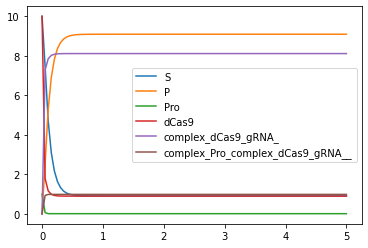

In [ ]:
CRN.write_sbml_file("CRISPRi.xml")
try:
    import bioscrape
    import numpy as np
    import pylab as plt
    import pandas as pd
    
    #Initial conditions can be set with a dictionary:
    x0 = {str(E):1,str(S):10, str(Pro):1,str(dCas9):10,str(gRNA):10}
    timepoints = np.linspace(0, 5, 100)#Timepoints to simulate over
    print(x0)
    print(timepoints)
    #This function can also take a filename keyword to save the file at the same time
    R = CRN.simulate_with_bioscrape_via_sbml(timepoints = timepoints, initial_condition_dict = x0)

    #Check to ensure simulation worked
    #Results are in a Pandas Dictionary and can be accessed via string-names of species
    #plt.plot(R['time'], R[str(E)], label = str(E))
    plt.plot(R['time'], R[str(S)], label = str(S))
    plt.plot(R['time'], R[str(P)], label = str(P))
    plt.plot(R['time'], R[str(Pro)], label = str(Pro))
    plt.plot(R['time'], R[str(dCas9)], label = str(dCas9))
    plt.plot(R['time'], R[str(C_Cg)], label = str(C_Cg))
    plt.plot(R['time'], R[str(C_i)], label = str(C_i))
    plt.legend()
    
except ModuleNotFoundError:
    print("Plotting Modules not installed.")